In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [6]:
mnist = tf.keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

x_train = x_train/255
X_test = x_test/255

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 ,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer = "sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
history= model.fit(x_train,y_train , validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6467 - accuracy: 0.8394 - val_loss: 36.2402 - val_accuracy: 0.9031
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.9067 - val_loss: 35.3151 - val_accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2865 - accuracy: 0.9196 - val_loss: 33.2463 - val_accuracy: 0.9240
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9282 - val_loss: 30.2685 - val_accuracy: 0.9306
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2340 - accuracy: 0.9344 - val_loss: 29.8343 - val_accuracy: 0.9336
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2158 - accuracy: 0.9396 - val_loss: 28.6026 - val_accuracy: 0.9353
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9435 - val_loss: 26.5698 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 22.2153 - accuracy: 0.9496
Loss= 22.215
Accuracy= 0.950


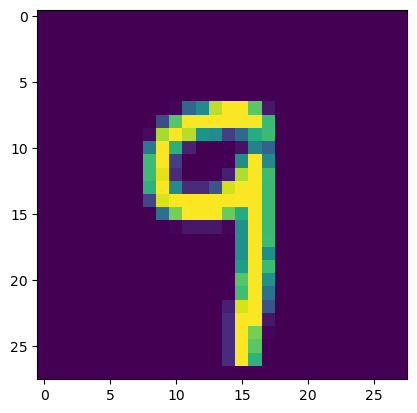

313/313 [==============================] - 1s 2ms/step


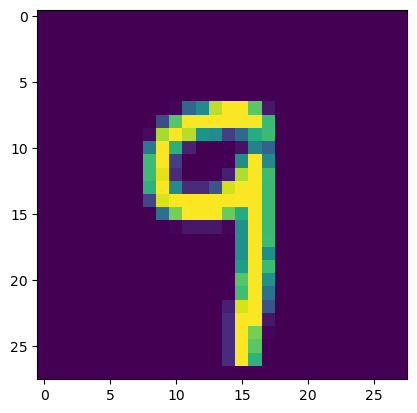

predicted_value [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
test_loss , test_accu = model.evaluate(x_test,y_test)
print("Loss= %.3f" %test_loss)
print("Accuracy= %.3f" %test_accu)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("predicted_value" ,predicted_value[n])

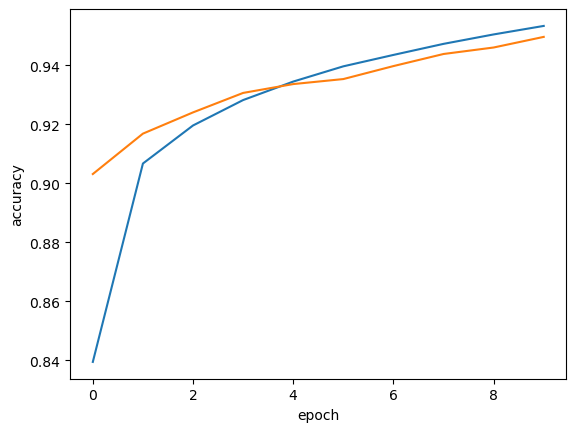

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

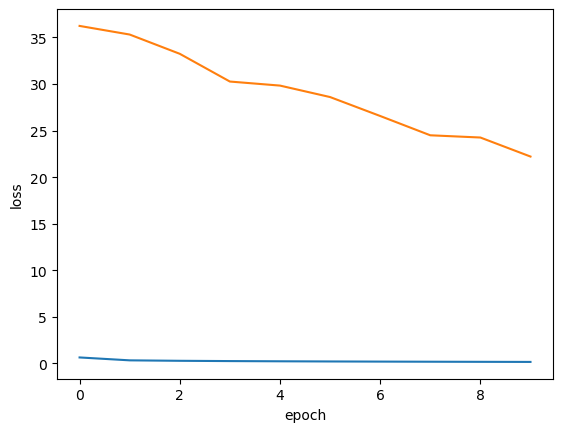

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()